In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import datetime

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [3]:
df = pd.read_csv('all_stocks_5yr.csv')
df.head()


,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [4]:
df.tail()

,date,open,high,low,close,volume,Name
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS
619039,2018-02-07,72.70,75.00,72.69,73.86,4534912,ZTS


In [5]:
df.drop(df.index[1258:],0,inplace=True)
df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.0700,15.1200,14.6300,14.7500,8407500,AAL
1,2013-02-11,14.8900,15.0100,14.2600,14.4600,8882000,AAL
2,2013-02-12,14.4500,14.5100,14.1000,14.2700,8126000,AAL
3,2013-02-13,14.3000,14.9400,14.2500,14.6600,10259500,AAL
4,2013-02-14,14.9400,14.9600,13.1600,13.9900,31879900,AAL
5,2013-02-15,13.9300,14.6100,13.9300,14.5000,15628000,AAL
6,2013-02-19,14.3300,14.5600,14.0800,14.2600,11354400,AAL
7,2013-02-20,14.1700,14.2600,13.1500,13.3300,14725200,AAL
8,2013-02-21,13.6200,13.9500,12.9000,13.3700,11922100,AAL
9,2013-02-22,13.5700,13.6000,13.2100,13.5700,6071400,AAL


In [6]:
df.shape

(1258, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1258 non-null   object 
 1   open    1258 non-null   float64
 2   high    1258 non-null   float64
 3   low     1258 non-null   float64
 4   close   1258 non-null   float64
 5   volume  1258 non-null   int64  
 6   Name    1258 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 78.6+ KB


In [8]:
df.describe()

,open,high,low,close,volume
count,1258.000000,1258.000000,1258.00000,1258.000000,1.258000e+03
mean,38.380544,38.945201,37.81522,38.382913,9.393934e+06
std,10.965759,11.071957,10.84170,10.955848,6.900857e+06
min,13.140000,13.420000,12.70000,13.020000,1.352400e+06
25%,34.197500,34.925000,33.68500,34.320000,5.702297e+06
50%,40.915000,41.419750,40.19995,40.855000,8.112725e+06
75%,46.550000,47.138225,45.95000,46.522500,1.119055e+07
max,58.790000,59.080000,57.80000,58.470000,1.377672e+08


In [9]:
df.shape

(1258, 7)

<AxesSubplot:>

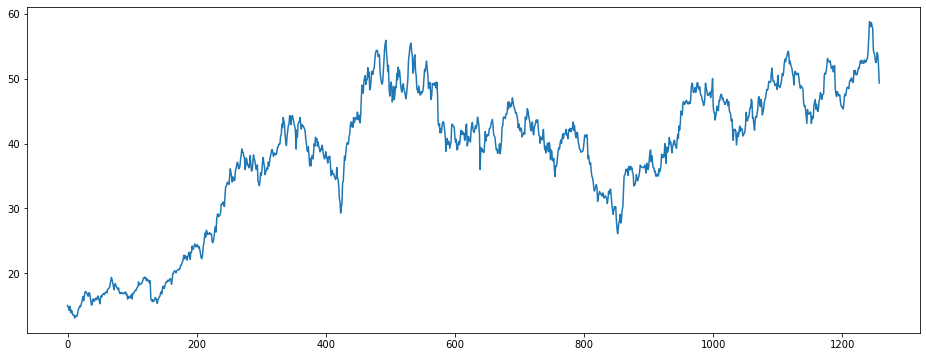

In [10]:
df['open'].plot(figsize=(16,6))

In [11]:
#7 day rolling mean
df.rolling(7).mean().head(20)

,open,high,low,close,volume
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,14.558571,14.815714,14.058571,14.412857,1.350533e+07
7,14.430000,14.692857,13.847143,14.210000,1.440786e+07
8,14.248571,14.541429,13.652857,14.054286,1.484216e+07
9,14.122857,14.411429,13.525714,13.954286,1.454864e+07


<AxesSubplot:>

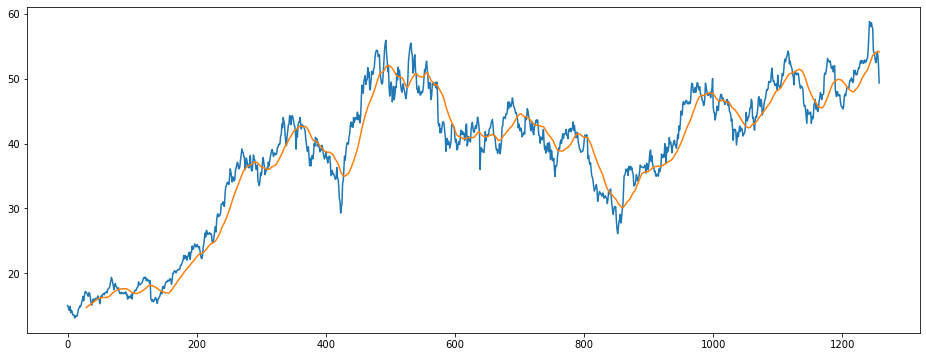

In [12]:
#rolling and previous graph
#This gives us the moving average of past 30 days
df['open'].plot(figsize=(16,6))
df.rolling(window=30).mean()['close'].plot()

In [13]:
#Data cleaning
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [14]:
training_set = df['open']
training_set=pd.DataFrame(training_set)

In [15]:
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [16]:
max_val=df['open'].max()
min_val=df['open'].min()
print(max_val)
print(min_val)

58.79
13.14


In [17]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0.5,0.6))
training_set_scaled = sc.fit_transform(training_set)

In [18]:
# Creating a data structure with 7 timesteps and 1 output
X_train = []
y_train = []
for i in range(7,1258):
    X_train.append(training_set_scaled[i-7:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)
#Reshaping
#X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3, random_state=1)

In [20]:
x_train_scaled=X_train.copy()
x_train_scaled=x_train_scaled/58.7

x_test_scaled=X_test.copy()
x_test_scaled=x_test_scaled/58.7

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# Decision Tree

In [22]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(min_samples_leaf=280)
dt.fit(X_train,y_train)
dt_score=dt.score(X_test,y_test)*100

print(dt_score)

pred=np.array(dt.predict(X_test))
actual=y_test
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

dt_mape=mape(actual,pred)
print("Mean Absolute Percentage error=",dt_mape)

75.81703120155584
Mean Absolute Percentage error= 1.6049776002203413


# Support Vector 

In [23]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
pred=np.array(svr.predict(X_test))
actual=y_test
svr_score=svr.score(X_test,y_test)*100 
svr_rmse=sqrt(mean_squared_error(actual, pred)) 
print(svr_score)
print(svr_rmse)
pred=np.array(svr.predict(X_test))
actual=y_test
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

svr_mape=mape(actual,pred)
print("Mean Absolute Percentage error=",svr_mape)

-3.0808137164065164
0.02361932044135055
Mean Absolute Percentage error= 3.5674004340532783


# Random Forest

In [24]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=1)
rfr.fit(X_train,y_train)
pred=np.array(rfr.predict(X_test))
actual=y_test
rfr_score=rfr.score(X_test,y_test)*100 
rfr_rmse=sqrt(mean_squared_error(actual, pred)) 
print(rfr_score)
print(rfr_rmse)

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

dt_mape=mape(actual,pred)
print("Mean Absolute Percentage error=",dt_mape)

98.65463504695018
0.0026983515739384223
Mean Absolute Percentage error= 0.36329117570937924


# Ann

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'linear'),
])

In [27]:
from tensorflow.keras.optimizers import Nadam

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.MeanAbsolutePercentageError()),
    
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
28/28 [==============================] - 0s 2ms/step - loss: 44.1159
Epoch 2/100
28/28 [==============================] - 0s 2ms/step - loss: 5.8414
Epoch 3/100
28/28 [==============================] - 0s 3ms/step - loss: 2.3184
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 2.4934
Epoch 5/100
28/28 [==============================] - 0s 2ms/step - loss: 3.1167
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 2.0798
Epoch 7/100
28/28 [==============================] - 0s 3ms/step - loss: 1.6413
Epoch 8/100
28/28 [==============================] - 0s 3ms/step - loss: 1.2271
Epoch 9/100
28/28 [==============================] - 0s 2ms/step - loss: 1.6652
Epoch 10/100
28/28 [==============================] - 0s 2ms/step - loss: 0.9421
Epoch 11/100
28/28 [==============================] - 0s 2ms/step - loss: 1.4092
Epoch 12/100
28/28 [==============================] - 0s 2ms/step - loss: 1.0968
Epoch 13/100
28/28 [================

In [28]:
mape=model.evaluate(X_test,y_test)

12/12 [==============================] - 0s 551us/step - loss: 0.3732


In [29]:
print("Mean Absolurte Percentage Error:",mape)

Mean Absolurte Percentage Error: 0.37315937876701355
